<a href="https://colab.research.google.com/github/sushant1911/Machine-Learning/blob/master/linear_regression_sklearn_and_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
files.upload()

In [0]:
import pandas as pd
df=pd.read_csv('USA_Housing.csv')

In [6]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [0]:
scale=sc.fit_transform(df.drop(['Price','Address'],axis=1))
dataframe=pd.DataFrame(scale,columns=df.columns[:-2])

In [0]:
import matplotlib.pyplot as plt
import seaborn as sb

In [0]:
sb.pairplot(dataframe)

In [0]:
from sklearn.model_selection import train_test_split
trainx,testx,triany,testy=train_test_split(dataframe,df['Price'],test_size=0.3,random_state=101)

In [30]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(trainx,triany)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
lr.score(trainx,triany)

0.9177641115595528

In [34]:
lr.intercept_

1232997.6254809126

In [36]:
lr.coef_

array([230377.52256205, 163793.11856645, 122101.35026888,   1627.31723652,
       151104.85081728])

In [0]:
predict=lr.predict(testx)

In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_absolute_error(predict,testy))

81257.55795855969


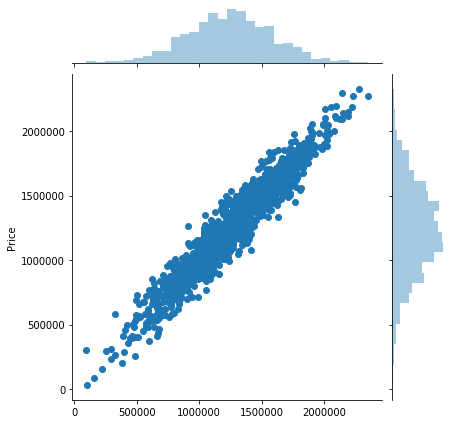

In [44]:
sb.jointplot(predict,testy )

In [45]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.15.0


In [48]:
# Use seaborn for pairplot
!pip install -q seaborn

# Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs

In [0]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [50]:
model=keras.Sequential([
                      keras.layers.Dense(64, activation='relu', input_shape=[len(trainx.keys())]),
                      keras.layers.Dense(64, activation='relu'),
                      keras.layers.Dense(1)
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),loss='mse',metrics=['mse','mae'])

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________


In [53]:
history = model.fit(
  trainx, triany,
  epochs=1000, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:1633716703817.1428,  mean_absolute_error:1227838.1250,  mean_squared_error:1633717190656.0000,  val_loss:1630082607537.0056,  val_mean_absolute_error:1229541.2500,  val_mean_squared_error:1630082564096.0000,  
....................................................................................................
Epoch: 100, loss:24904788962.7429,  mean_absolute_error:123353.1406,  mean_squared_error:24904787968.0000,  val_loss:21583452265.3257,  val_mean_absolute_error:117111.1641,  val_mean_squared_error:21583454208.0000,  
....................................................................................................
Epoch: 200, loss:10857289994.2400,  mean_absolute_error:83463.2422,  mean_squared_error:10857288704.0000,  val_loss:9726891879.8629,  val_mean_absolute_error:79152.5078,  val_mean_squared_error:9726892032.0000,  
....................................................................................................
Epoch: 300, loss:10524502952.2286,  mean_

In [0]:
test_predictions = model.predict(testx).flatten()

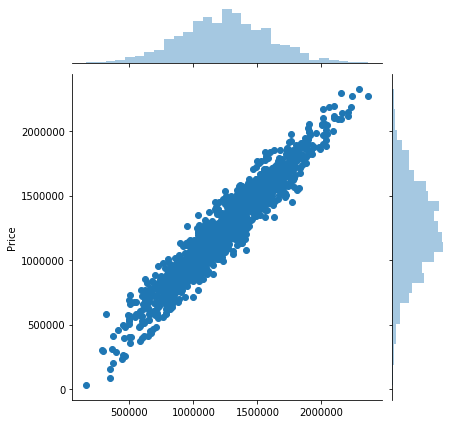

In [55]:
sb.jointplot(test_predictions,testy)